In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

device = "cuda"

def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("The tensor should be 4D")
    
    num_kernels = tensor.shape[0]
    num_rows = num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols, num_rows))
    
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        ax1.imshow(tensor[i][0].cpu().detach(), cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def init_weights(model, val=0.2):
    # Set every weight to 1 and biases to 0
    for param in model.parameters():
        if param.requires_grad:
            if len(param.shape) > 1:  # This is a weight tensor
                nn.init.constant_(param, val)
            else:  # This is a bias tensor
                nn.init.constant_(param, 0)
                 
# Define the LeNet-5 architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=0)  # Convolutional layer with 6 filters of size 5x5
        self.tanh1 = nn.Tanh()  # Tanh activation function
        self.avgpool1 = nn.AvgPool2d(2, stride=2)  # Average pooling layer with size 2x2 and stride 2
        self.conv2 = nn.Conv2d(6, 16, 5, padding=0)  # Second convolutional layer with 16 filters of size 5x5
        self.tanh2 = nn.Tanh()  # Tanh activation function
        self.avgpool2 = nn.AvgPool2d(2, stride=2)  # Average pooling layer
        self.conv3 = nn.Conv2d(16, 120, 5, padding=0)  # Third convolutional layer
        self.tanh3 = nn.Tanh()  # Tanh activation function
        self.fc1 = nn.Linear(120, 84)  # Fully connected layer
        self.tanh4 = nn.Tanh()  # Tanh activation function
        self.fc2 = nn.Linear(84, 10)  # Output layer with 10 units for 10 classes
        self.softmax = nn.Softmax(dim=1)  # Softmax activation function
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.avgpool2(x)
        x = self.conv3(x)
        x = self.tanh3(x)
        x = x.view(-1, 120)  # Flatten the tensor for the fully connected layers
        x = self.fc1(x)
        x = self.tanh4(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

class ConvLeNet(nn.Module):
    def __init__(self, trained_model=None):
        super(ConvLeNet, self).__init__()
        if(trained_model is None):
            self.conv1 = nn.Conv2d(1, 6, 5, padding=0)
            self.tanh1 = nn.Tanh()
            self.avgpool1 = nn.AvgPool2d(2, stride=2)
            self.conv2 = nn.Conv2d(6, 16, 5, padding=0)
            self.tanh2 = nn.Tanh()
            self.avgpool2 = nn.AvgPool2d(2, stride=2)
            self.conv3 = nn.Conv2d(16, 120, 5, padding=0)
            self.tanh3 = nn.Tanh()
        else:
            self.conv1 = trained_model.conv1
            self.tanh1 = trained_model.tanh1
            self.avgpool1 = trained_model.avgpool1
            self.conv2 = trained_model.conv2
            self.tanh2 = trained_model.tanh2
            self.avgpool2 = trained_model.avgpool2
            self.conv3 = trained_model.conv3
            self.tanh3 = trained_model.tanh3
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.avgpool2(x)
        x = self.conv3(x)
        x = self.tanh3(x)
        return x
    
class CNN15Layers(nn.Module):
    def __init__(self):
        super(CNN15Layers, self).__init__()
        layers = []
        
        # Define the 20 convolutional layers
        input_channels = 1
        for i in range(15):
            layers.append(nn.Conv2d(input_channels, 32, kernel_size=3, padding=1, padding_mode='zeros'))
            input_channels = 32  # After the first layer, all other layers take 64 input channels
        
        # Use nn.Sequential to stack all the layers
        self.conv_layers = nn.Sequential(*layers)
        
        
    def forward(self, x):
        x = self.conv_layers(x)
        return x
    
class CNN15LayersReLU(nn.Module):
    def __init__(self):
        super(CNN15LayersReLU, self).__init__()
        layers = []
        
        # Define the 20 convolutional layers
        input_channels = 1
        for i in range(15):
            layers.append(nn.Conv2d(input_channels, 32, kernel_size=3, padding=1, padding_mode='zeros'))
            input_channels = 32  # After the first layer, all other layers take 64 input channels
            layers.append(nn.ReLU())
        # Use nn.Sequential to stack all the layers
        self.conv_layers = nn.Sequential(*layers)
        
        
    def forward(self, x):
        x = self.conv_layers(x)
        return x
    
    
class CNN15LayersTanh(nn.Module):
    def __init__(self):
        super(CNN15LayersTanh, self).__init__()
        layers = []
        
        # Define the 20 convolutional layers
        input_channels = 1
        for i in range(15):
            layers.append(nn.Conv2d(input_channels, 32, kernel_size=3, padding=1, padding_mode='zeros'))
            input_channels = 32  # After the first layer, all other layers take 64 input channels
            layers.append(nn.Tanh())
        # Use nn.Sequential to stack all the layers
        self.conv_layers = nn.Sequential(*layers)
        
        
    def forward(self, x):
        x = self.conv_layers(x)
        return x

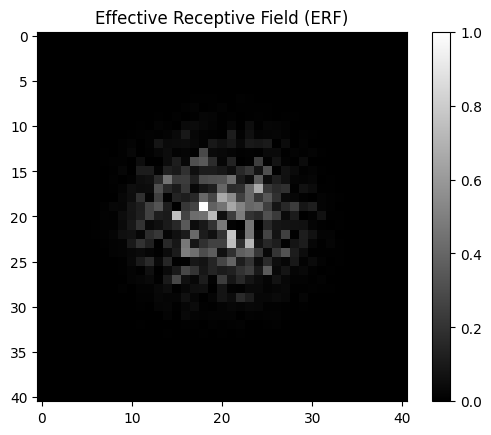

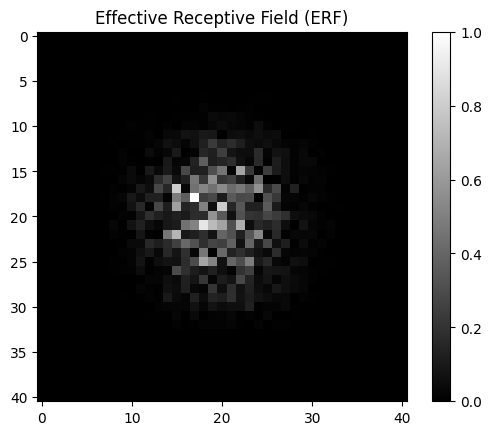

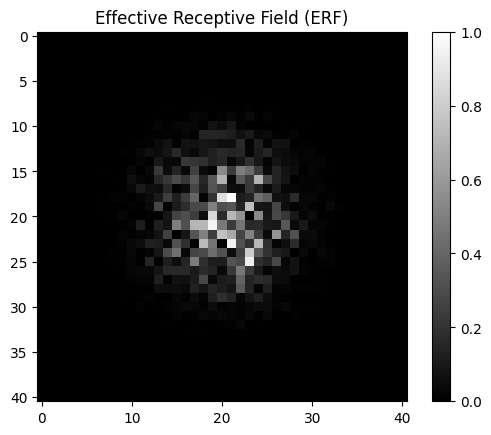

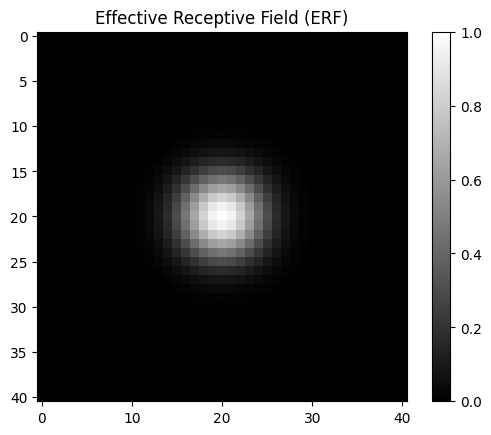

In [2]:
# Create the model instance
cnn20 = CNN15Layers().to(device=device)
cnn20relu = CNN15LayersReLU().to(device=device)
cnn20uniform = CNN15Layers().to(device=device)
cnn20tnah = CNN15LayersTanh().to(device=device)

init_weights(cnn20uniform, val=0.1)


def visualize_erf(model, input_shape=(1, 1, 32, 32), output_index=0, device='cuda', im_name='erf.png'):
    
    # Initialize the input tensor with zero, set it to require gradients
    # input_tensor = torch.zeros(input_shape, device=device, requires_grad=True)
    input_tensor = torch.ones(input_shape, device=device, requires_grad=True)
    # input_tensor = torch.randn(input_shape, device=device, requires_grad=True)
    # Set the model to evaluation mode
    model.eval()

    # Forward pass: compute the output tensor
    output = model(input_tensor)
    
    # Initialize the output gradient as zero everywhere and 1 at a specific location
    grad_output = torch.zeros_like(output)
    x, y = grad_output.shape[2] // 2, grad_output.shape[3] // 2
    grad_output[0, output_index, x, y] = 1  # Target a specific output unit

    # Backward pass: compute gradient of the output with respect to the input image
    output.backward(grad_output)

    # Retrieve the gradient of the input
    grad_input = input_tensor.grad.data[0, 0].cpu().numpy()
    grad_input = np.abs(grad_input)  # Get the absolute values of the gradients
    grad_input = grad_input / grad_input.max()  # Normalize the gradients
        
    # Plot the gradient
    plt.imshow(grad_input, cmap='gray', interpolation='nearest')
    plt.imsave(im_name, grad_input, cmap='gray')
    plt.title("Effective Receptive Field (ERF)")
    plt.colorbar()
    plt.show()
   
output_index = 3
input_shape = (1, 1, 41, 41)

visualize_erf(cnn20, input_shape=input_shape, output_index=output_index, device='cuda', im_name='erf_conv.png')
visualize_erf(cnn20relu, input_shape=input_shape, output_index=output_index, device='cuda', im_name='erf_conv_relu.png')
visualize_erf(cnn20tnah, input_shape=input_shape, output_index=output_index, device='cuda', im_name='erf_conv_tanh.png')
visualize_erf(cnn20uniform, input_shape=input_shape, output_index=output_index, device='cuda', im_name='erf_conv_uniform.png')


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32 to match the original LeNet-5 input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training and test sets
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

device = "cuda"
# Split training set for training and validation
num_train = len(train_set)
indices = list(range(num_train))
split = int(0.8 * num_train)  # 80% for training, 20% for validation

train_indices, val_indices = indices[:split], indices[split:]
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

# Data loaders
batch_size = 256
num_workers = 8

train_loader = DataLoader(train_set, batch_size=batch_size, num_workers=num_workers, sampler=train_sampler)
test_loader = DataLoader(test_set, batch_size=batch_size, num_workers=num_workers, shuffle=False)
val_loader = DataLoader(train_set, batch_size=batch_size, num_workers=num_workers, sampler=val_sampler)

device = "cuda"

# Initialize the network
model = LeNet().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train(model, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        with tqdm(train_loader, unit="batch") as tepoch:
            for images, labels in tepoch:
                tepoch.set_description(f"Epoch {epoch+1}")
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                tepoch.set_postfix(loss=running_loss/len(train_loader))
        validate(model, epoch)
        
# Test the model
def test(model):
    model.eval()
    with torch.no_grad():
        with tqdm(test_loader, unit="batch") as tepoch:
            correct = 0
            total = 0
            for images, labels in tepoch:
                images, labels = images.to(device), labels.to(device)
                tepoch.set_description("Testing")
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')
        

def validate(model, epoch):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad(), tqdm(val_loader, unit="batch") as vepoch:
        for images, labels in vepoch:
            images, labels = images.to(device), labels.to(device)
            vepoch.set_description(f"Epoch {epoch+1}/Validation")
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        vepoch.set_postfix(validation_accuracy=accuracy)

In [4]:
def visualize_erf(model, input_shape=(1, 1, 32, 32), device='cuda', im_name='erf.png'):
    input_tensor = torch.zeros(input_shape, device=device, requires_grad=True)
    # input_tensor = torch.randn(input_shape, device=device, requires_grad=True)
    # Set the model to evaluation mode
    model.eval()

    # Forward pass: compute the output tensor
    output = model(input_tensor)
    
    # Initialize the output gradient as zero everywhere and 1 at a specific location
    grad_output = torch.zeros_like(output)
    x, y = grad_output.shape[2] // 2, grad_output.shape[3] // 2
    
    for i in range(grad_output.shape[1]):
        grad_output[0, i, x, y] = 1  # Target a specific output unit

    # Backward pass: compute gradient of the output with respect to the input image
    output.backward(grad_output)

    # Retrieve the gradient of the input
    grad_input = input_tensor.grad.data[0, 0].cpu().numpy()
    grad_input = np.abs(grad_input)  # Get the absolute values of the gradients
    grad_input = grad_input / np.max(grad_input) # Normalize the gradients

    # Plot the gradient
    plt.imshow(grad_input, cmap='gray', interpolation='nearest')
    plt.imsave(im_name, grad_input, cmap='gray')
    plt.title("Effective Receptive Field (ERF)")
    plt.colorbar()
    plt.show()
   

Epoch 1/Validation: 100%|██████████| 47/47 [00:00<00:00, 84.56batch/s]


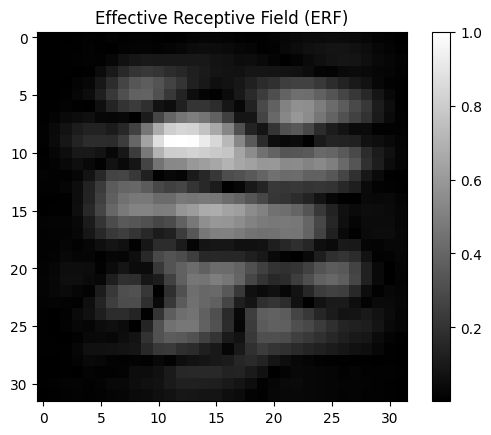

In [24]:
train(model, num_epochs=1)
conv_trained = ConvLeNet(model).to(device=device)
visualize_erf(conv_trained, input_shape=(1, 1, 32, 32), device='cuda', im_name='erf_trained_20.png')


In [121]:
test(model)

Testing: 100%|██████████| 40/40 [00:01<00:00, 38.79batch/s]


Accuracy of the model on the 10000 test images: 98.55%


In [16]:
conv_trained = ConvLeNet(model).to(device=device)
conv_untrained = ConvLeNet().to(device=device)

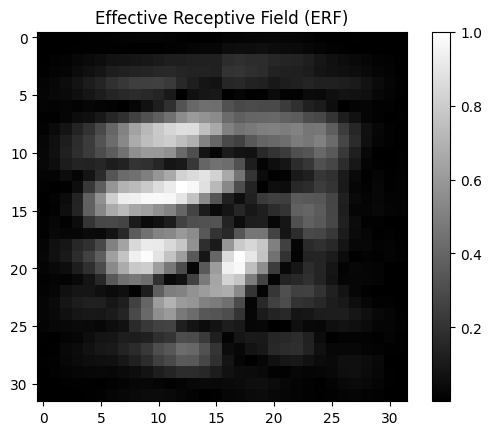

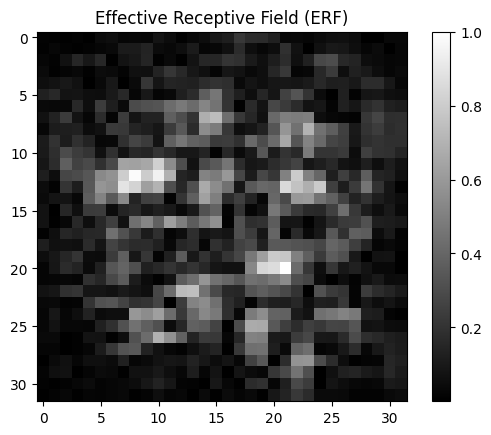

In [123]:
visualize_erf(conv_trained, input_shape=(1, 1, 32, 32), device='cuda', im_name='erf_trained.png')
visualize_erf(conv_untrained, input_shape=(1, 1, 32, 32), device='cuda', im_name='erf_untrained.png')

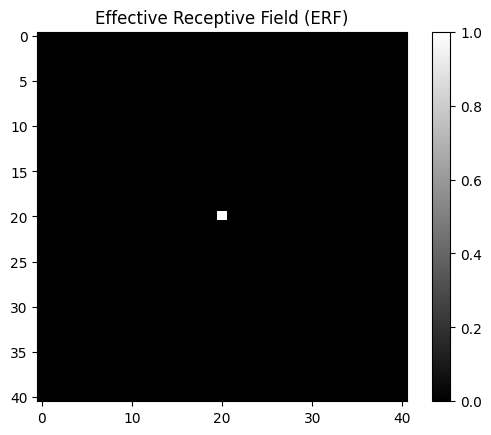

In [132]:
tensor = torch.zeros(1, 1, 41, 41, requires_grad=False)

tensor[0, 0, 20, 20] = 1

# Plot the gradient
plt.imshow(tensor.squeeze().numpy(), cmap='gray', interpolation='nearest')
plt.imsave("feature_one.png", tensor.squeeze().numpy(), cmap='gray')
plt.title("Effective Receptive Field (ERF)")
plt.colorbar()
plt.show()

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_gradients(model, input_shape=(1, 1, 32, 32), device='cuda', gradients_dir='gradients'):
    input_tensor = torch.zeros(input_shape, device=device, requires_grad=True)
    # input_tensor = torch.randn(input_shape, device=device, requires_grad=True)
    # Set the model to evaluation mode
    model.eval()

    # Create a directory to save the gradients
    os.makedirs(gradients_dir, exist_ok=True)
    
    # Function to save the gradient as an image
    def save_gradient(name):
        def hook(grad):
            grad = grad[0].cpu().numpy()
            grad = np.abs(grad)  # Get the absolute values of the gradients
            grad = grad / np.max(grad)  # Normalize the gradients

            if grad.shape[0] > 1:
                grad = np.mean(grad, axis=0)
                
            grad = grad.squeeze()
            plt.imsave(os.path.join(gradients_dir, f'{name}_grad.png'), grad, cmap='gray')
        return hook

    # Register hooks to save gradients for each layer
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            module.register_full_backward_hook(lambda module, grad_input, grad_output, name=name: save_gradient(name)(grad_input[0]))

    # Forward pass: compute the output tensor
    output = model(input_tensor)
    
    # Initialize the output gradient as zero everywhere and 1 at a specific location
    grad_output = torch.zeros_like(output)
    x, y = grad_output.shape[2] // 2, grad_output.shape[3] // 2
    
    for i in range(grad_output.shape[1]):
        grad_output[0, i, x, y] = 1  # Target a specific output unit

    # Backward pass: compute gradient of the output with respect to the input image
    output.backward(grad_output)

# Device configuration
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Instantiate the model
cnn20 = CNN15Layers().to(device=device)
cnn20relu = CNN15LayersReLU().to(device=device)
cnn20tanh= CNN15LayersTanh().to(device=device)
cnn20uniform = CNN15Layers().to(device=device)

init_weights(cnn20uniform, val=0.1)
conv_untrained = ConvLeNet().to(device=device)

# Visualize gradients
visualize_gradients(cnn20, input_shape=(1, 1, 32, 32), device=device, gradients_dir='gradients_cnn20')
visualize_gradients(cnn20relu, input_shape=(1, 1, 32, 32), device=device, gradients_dir='gradients_cnn20relu')
visualize_gradients(cnn20tanh, input_shape=(1, 1, 32, 32), device=device, gradients_dir='gradients_cnn20tanh')
visualize_gradients(cnn20uniform, input_shape=(1, 1, 32, 32), device=device, gradients_dir='gradients_cnn20uniform')
visualize_gradients(conv_untrained, input_shape=(1, 1, 32, 32), device=device, gradients_dir='gradients_conv_untrained')

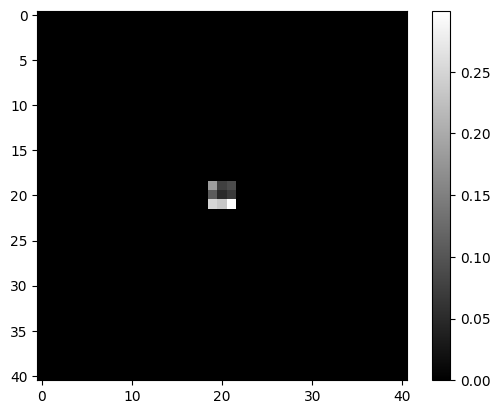

In [151]:
t = np.load("gradients/conv_layers.19_grad.npy")

plt.imsave("images/feature_two.png", np.abs(t[0, 6]), cmap='gray')
plt.imshow(np.abs(t[0, 6]), cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()